### Machine Learning

- Make a Machine Learn from the past to predict the future.

### Types in Machine Learning:

1. Supervised Learning - Deals with Labeled data
    - Classification  - we predict a descrete value like spam or not , male or female
    
    - Regression - we predict a number line age, weight etc.
    
2. Unsupervised Learning - Deals with Unlabeled data
    - Clustering - group the data into clusters
    - Dimensionality Reduction - reduction of high dimensional features into low dimentional.

## K-Means Algorithm

- It clustering type 
- Deals with Unlabeled data
- Also called as Centroid based algorithm.
- Based on the k value it divides data into k number of groups or clusters.

### Steps for selecting a algorithm

- Take a Dataset
- Problem Statement
- Identify the type (clf or reg or clustering)
- Select the algorithm
- Preprocess data
- Split the data
- train the model
- test the model
- evaluate the model performance

### Kmeans Algorithms back-end steps

- defined the k value
- it will select k random points from each cluster.
- it will a random data point from the dataset.
- calculate the distance between cluster point to dataset point
- it will make a cluster based on the minimum distance.
- update centroid value.
- repeat the above two steps until we get enough clusters.

In [3]:
import pandas as pd

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# dividing the input and output values
x = data.drop(['Id','Species'],axis = 1)

In [8]:
# split the data train and test

from sklearn.model_selection import train_test_split

x_train,x_test = train_test_split(x,random_state = 1)

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)

km.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
km.predict(x_test)

array([1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1])

## Linear Regression

- one input and one output
- x and y

- y = mx+c

m(slope) = sum((xi-mean(x)) * (yi-mean(y))) / sum((xi – mean(x))^2)
    - c(y-intercept) = mean(y) – b * mean(x)

m is slope
c is y intercept

In [12]:
data = pd.read_csv('house.csv')
data

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'Price')

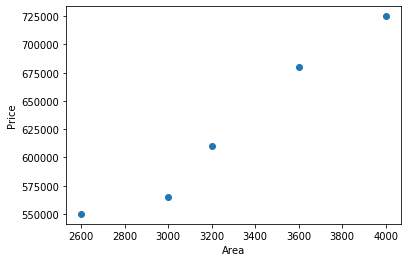

In [17]:
x = data[['Area']]
y = data['Price']

import matplotlib.pyplot as plt

plt.scatter(x,y)

plt.xlabel("Area")
plt.ylabel("Price")

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.intercept_ # c value

180616.43835616432

In [21]:
lr.coef_ # m value

array([135.78767123])

In [ ]:
y = mx + c

In [23]:
lr.predict([[3100]])

array([601558.21917808])

In [24]:
135.78767123 * 3100 + 180616.43835616432

601558.2191691643

## Logistic Regression

In [25]:
gender = pd.read_csv("gender.csv")

In [26]:
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [28]:
for i in gender['Favorite Soft Drink']:
    if '/' in i:
        gender = gender.replace(to_replace = i,value = i.split('/')[0])

In [29]:
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP,F
1,Neutral,Hip hop,Vodka,Coca Cola,F
2,Warm,Rock,Wine,Coca Cola,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola,F


In [31]:
color = pd.get_dummies(gender['Favorite Color'])
genre = pd.get_dummies(gender['Favorite Music Genre'])
beverage = pd.get_dummies(gender['Favorite Beverage'])
drink = pd.get_dummies(gender['Favorite Soft Drink'])

In [35]:
gender = pd.concat((gender,color,genre,beverage,drink),axis =1)
gender.drop(['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink'],axis=1,inplace = True)

In [36]:
gender.head()

,Gender,Cool,Neutral,Warm,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,...,Beer,Doesn't drink,Other,Vodka,Whiskey,Wine,7UP,Coca Cola,Fanta,Other
0,F,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,F,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,F,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,F,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [37]:
x = gender.drop('Gender',axis = 1)
y = gender['Gender']

In [38]:
from sklearn.preprocessing import LabelEncoder

lab_en = LabelEncoder()
y = lab_en.fit_transform(y)

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)


In [86]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred = log_reg.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)*100

82.35294117647058

In [89]:
confusion_matrix(y_test,y_pred)

array([[ 4,  2],
       [ 1, 10]], dtype=int64)